In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import make_column_transformer

In [110]:
path = (r'C:\Users\Hp\Downloads\melb_data.csv')
data = pd.read_csv(path)
data = pd.DataFrame(data)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [112]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## DATA CLEANING 

In [113]:
display(data.shape)
display (data.dropna().shape)

(13580, 21)

(6196, 21)

In [114]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Setting Categorical Price Values 

In [115]:
data["log_price"] = np.log1p(data.Price.dropna())
log_price_mean = data['log_price'].mean()
log_price_std = data['log_price'].std()
data['high_price']= np.where(data["log_price"]>(log_price_mean+log_price_std),1,0
                            )
data["low_price"] = np.where(data['log_price']>(log_price_mean+log_price_std),1,0
                            )

display(data["high_price"].value_counts())
display(data["low_price"].value_counts())

0    11366
1     2214
Name: high_price, dtype: int64

0    11366
1     2214
Name: low_price, dtype: int64

### One hot Encoding

In [116]:
display(data.Suburb.nunique(dropna= True))
display(data.Address.nunique(dropna= True))
display(data.Method.nunique(dropna= True))
display(data.Type.nunique(dropna= True))
display(data.SellerG.nunique(dropna= True))
display(data.Date.nunique(dropna= True))
display(data.CouncilArea.nunique(dropna= True))
display(data.Regionname.nunique(dropna= True))

# I have considered columns with only "object" datatype. 

314

13378

5

3

268

58

33

8

As you can see SUBURB, ADDRESS, SELLERG, DATE, COUNCILAREA have too many unique values to be one hot encoded hence we are going to drop them 

In [117]:
#Creating a Drop List 
drop_list = ["Suburb", "Address", "SellerG","CouncilArea"]
data = data.drop(drop_list, axis='columns')

In [118]:
display(data.head())
display(data.shape)
display(data.info())

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,log_price,high_price,low_price
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019,14.207553,0,0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019,13.849913,0,0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019,14.197366,0,0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019,13.652993,0,0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019,14.285515,1,1


(13580, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  object 
 2   Price          13580 non-null  int64  
 3   Method         13580 non-null  object 
 4   Date           13580 non-null  object 
 5   Distance       13580 non-null  float64
 6   Postcode       13580 non-null  int64  
 7   Bedroom2       13580 non-null  int64  
 8   Bathroom       13580 non-null  int64  
 9   Car            13518 non-null  float64
 10  Landsize       13580 non-null  int64  
 11  BuildingArea   7130 non-null   float64
 12  YearBuilt      8205 non-null   float64
 13  Lattitude      13580 non-null  float64
 14  Longtitude     13580 non-null  float64
 15  Regionname     13580 non-null  object 
 16  Propertycount  13580 non-null  int64  
 17  log_price      13580 non-null  float64
 18  high_p

None

There are only 4 columns of object datatype i.e., TYPE, METHOD, DATE, REGIONNAME. Since Date can be converted into date and time format, I am going to exclude that.

In [119]:
#Selecting particular columns from dataset 
data[["Type","Method","Regionname"]].isna().sum()

Type          0
Method        0
Regionname    0
dtype: int64

In [120]:
#Since there are no null values, we can proceed. 
#one hot encoding 
ohe = OneHotEncoder(sparse = False)


In [121]:
col_trans = make_column_transformer((ohe,["Type","Method","Regionname"]),remainder = "passthrough")

In [122]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['Type', 'Method', 'Regionname'])])

In [123]:
data

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,log_price,high_price,low_price
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,202,NaN,NaN,-37.79960,144.99840,Northern Metropolitan,4019,14.207553,0,0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019,13.849913,0,0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019,14.197366,0,0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,94,NaN,NaN,-37.79690,144.99690,Northern Metropolitan,4019,13.652993,0,0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019,14.285515,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000,S,26-08-2017,16.7,3150,4,2,2.0,652,NaN,1981.0,-37.90562,145.16761,South-Eastern Metropolitan,7392,14.034647,0,0
13576,3,h,1031000,SP,26-08-2017,6.8,3016,3,2,2.0,333,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380,13.846041,0,0
13577,3,h,1170000,S,26-08-2017,6.8,3016,3,2,4.0,436,NaN,1997.0,-37.85274,144.88738,Western Metropolitan,6380,13.972515,0,0
13578,4,h,2500000,PI,26-08-2017,6.8,3016,4,1,5.0,866,157.0,1920.0,-37.85908,144.89299,Western Metropolitan,6380,14.731802,1,1


In [124]:
data_reshaped = data["Type"].values.reshape(-1,1)
data_1hot = ohe.fit_transform(data_reshaped)
categories = ohe.categories_
data_1hot = pd.DataFrame(data_1hot,columns = categories)
data_1hot

,h,t,u
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13575,1.0,0.0,0.0
13576,1.0,0.0,0.0
13577,1.0,0.0,0.0
13578,1.0,0.0,0.0


As We can see, we have converted, "Type" column into categories, using one hot encoding. 


In [125]:
data = data.reset_index().drop('index', axis =1 )
data = pd.concat([data, data_1hot],axis =1)
data.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,Lattitude,Longtitude,Regionname,Propertycount,log_price,high_price,low_price,"(h,)","(t,)","(u,)"
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,...,-37.7996,144.9984,Northern Metropolitan,4019,14.207553,0,0,1.0,0.0,0.0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,...,-37.8079,144.9934,Northern Metropolitan,4019,13.849913,0,0,1.0,0.0,0.0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,...,-37.8093,144.9944,Northern Metropolitan,4019,14.197366,0,0,1.0,0.0,0.0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,...,-37.7969,144.9969,Northern Metropolitan,4019,13.652993,0,0,1.0,0.0,0.0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,...,-37.8072,144.9941,Northern Metropolitan,4019,14.285515,1,1,1.0,0.0,0.0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  object 
 2   Price          13580 non-null  int64  
 3   Method         13580 non-null  object 
 4   Date           13580 non-null  object 
 5   Distance       13580 non-null  float64
 6   Postcode       13580 non-null  int64  
 7   Bedroom2       13580 non-null  int64  
 8   Bathroom       13580 non-null  int64  
 9   Car            13518 non-null  float64
 10  Landsize       13580 non-null  int64  
 11  BuildingArea   7130 non-null   float64
 12  YearBuilt      8205 non-null   float64
 13  Lattitude      13580 non-null  float64
 14  Longtitude     13580 non-null  float64
 15  Regionname     13580 non-null  object 
 16  Propertycount  13580 non-null  int64  
 17  log_price      13580 non-null  float64
 18  high_p

In [127]:
# One hot Encode Method Feature
data_meth_reshaped = data["Method"].values.reshape(-1,1)
data_meth_1hot  = ohe.fit_transform(data_meth_reshaped)
categories = ohe.categories_
data_meth_1hot = pd.DataFrame(data_meth_1hot, columns = categories)
data_meth_1hot

,PI,S,SA,SP,VB
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
13575,0.0,1.0,0.0,0.0,0.0
13576,0.0,0.0,0.0,1.0,0.0
13577,0.0,1.0,0.0,0.0,0.0
13578,1.0,0.0,0.0,0.0,0.0


In [128]:
data = pd.concat([data,data_meth_1hot],axis=1)
data

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,high_price,low_price,"(h,)","(t,)","(u,)","(PI,)","(S,)","(SA,)","(SP,)","(VB,)"
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,...,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,...,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000,S,26-08-2017,16.7,3150,4,2,2.0,...,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13576,3,h,1031000,SP,26-08-2017,6.8,3016,3,2,2.0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13577,3,h,1170000,S,26-08-2017,6.8,3016,3,2,4.0,...,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13578,4,h,2500000,PI,26-08-2017,6.8,3016,4,1,5.0,...,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [129]:
#One hot Encode Regionname feature
data_reg_reshaped = data["Regionname"].values.reshape(-1,1)
data_reg_1hot = ohe.fit_transform(data_reg_reshaped)
categories = ohe.categories_
data_reg_1hot = pd.DataFrame(data_reg_1hot,columns = categories)
data_reg_1hot

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13575,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13577,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13578,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [130]:
data= pd.concat([data, data_reg_1hot],axis = 1)
data

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,"(SP,)","(VB,)","(Eastern Metropolitan,)","(Eastern Victoria,)","(Northern Metropolitan,)","(Northern Victoria,)","(South-Eastern Metropolitan,)","(Southern Metropolitan,)","(Western Metropolitan,)","(Western Victoria,)"
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000,S,26-08-2017,16.7,3150,4,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13576,3,h,1031000,SP,26-08-2017,6.8,3016,3,2,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13577,3,h,1170000,S,26-08-2017,6.8,3016,3,2,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13578,4,h,2500000,PI,26-08-2017,6.8,3016,4,1,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rooms                          13580 non-null  int64  
 1   Type                           13580 non-null  object 
 2   Price                          13580 non-null  int64  
 3   Method                         13580 non-null  object 
 4   Date                           13580 non-null  object 
 5   Distance                       13580 non-null  float64
 6   Postcode                       13580 non-null  int64  
 7   Bedroom2                       13580 non-null  int64  
 8   Bathroom                       13580 non-null  int64  
 9   Car                            13518 non-null  float64
 10  Landsize                       13580 non-null  int64  
 11  BuildingArea                   7130 non-null   float64
 12  YearBuilt                      8205 non-null  

In [132]:
data.isna().sum()

Rooms                               0
Type                                0
Price                               0
Method                              0
Date                                0
Distance                            0
Postcode                            0
Bedroom2                            0
Bathroom                            0
Car                                62
Landsize                            0
BuildingArea                     6450
YearBuilt                        5375
Lattitude                           0
Longtitude                          0
Regionname                          0
Propertycount                       0
log_price                           0
high_price                          0
low_price                           0
(h,)                                0
(t,)                                0
(u,)                                0
(PI,)                               0
(S,)                                0
(SA,)                               0
(SP,)       

## Filling NA values 

There are 3 columns where NA values are present 
* Car 
* Building Area
* Year Built 

In [133]:
data_check = pd.DataFrame(data,columns =["Car","BuildingArea","YearBuilt"])
data_check.dtypes

Car             float64
BuildingArea    float64
YearBuilt       float64
dtype: object

As we can see all are numeric dtypes hence we will fill NA values with mean 

In [134]:
data["Car"]=data["Car"].fillna(data["Car"].mean())
data["BuildingArea"] = data["BuildingArea"].fillna(data["BuildingArea"].mean())
data["YearBuilt"] = data["YearBuilt"].fillna(data["YearBuilt"].mean())

In [135]:
data.isna().sum()

Rooms                            0
Type                             0
Price                            0
Method                           0
Date                             0
Distance                         0
Postcode                         0
Bedroom2                         0
Bathroom                         0
Car                              0
Landsize                         0
BuildingArea                     0
YearBuilt                        0
Lattitude                        0
Longtitude                       0
Regionname                       0
Propertycount                    0
log_price                        0
high_price                       0
low_price                        0
(h,)                             0
(t,)                             0
(u,)                             0
(PI,)                            0
(S,)                             0
(SA,)                            0
(SP,)                            0
(VB,)                            0
(Eastern Metropolita

As we can see There are no null data

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rooms                          13580 non-null  int64  
 1   Type                           13580 non-null  object 
 2   Price                          13580 non-null  int64  
 3   Method                         13580 non-null  object 
 4   Date                           13580 non-null  object 
 5   Distance                       13580 non-null  float64
 6   Postcode                       13580 non-null  int64  
 7   Bedroom2                       13580 non-null  int64  
 8   Bathroom                       13580 non-null  int64  
 9   Car                            13580 non-null  float64
 10  Landsize                       13580 non-null  int64  
 11  BuildingArea                   13580 non-null  float64
 12  YearBuilt                      13580 non-null 

In [137]:
data_na = data.dropna(subset=["Price", "log_price"],axis =0)

In [138]:
# find our features with dtype == object
objects = []

for i in data.columns.values:
    if data[i].dtype == 'O':
        objects.append(str(i))

data = data.drop(objects, axis=1)

data.isna().sum()

Rooms                            0
Price                            0
Distance                         0
Postcode                         0
Bedroom2                         0
Bathroom                         0
Car                              0
Landsize                         0
BuildingArea                     0
YearBuilt                        0
Lattitude                        0
Longtitude                       0
Propertycount                    0
log_price                        0
high_price                       0
low_price                        0
(h,)                             0
(t,)                             0
(u,)                             0
(PI,)                            0
(S,)                             0
(SA,)                            0
(SP,)                            0
(VB,)                            0
(Eastern Metropolitan,)          0
(Eastern Victoria,)              0
(Northern Metropolitan,)         0
(Northern Victoria,)             0
(South-Eastern Metro

In [139]:
# drop regional data
cols = ['Bedroom2', 'Bathroom', 'Car',
        'Landsize','BuildingArea', 'YearBuilt',
        'high_price', 'low_price']
data_num = data[cols]

# check nulls
data_num.isna().sum()

Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
high_price      0
low_price       0
dtype: int64

In [140]:
# fill NaN values by median of price category
data_num.loc[data_num['high_price']==1] = data_num.loc[
    data_num['high_price']==1].apply(lambda x: x.fillna(x.median()),axis=0)
data_num.loc[data_num['low_price']==1] = data_num.loc[
    data_num['low_price']==1].apply(lambda x: x.fillna(x.median()),axis=0)
data_num.loc[data_num['high_price' and 'low_price']==0] = data_num.loc[
    data_num['high_price' and 'low_price']==0].apply(lambda x: x.fillna(x.median()),axis=0)

data_num.isna().sum()

D:\New folder\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
high_price      0
low_price       0
dtype: int64

In [141]:
# concat filled NaNs w/ the rest of our data
data_num = pd.concat([data_na.drop(cols, axis=1), data_num], axis=1)
display(data_na.head())
data_na.isna().sum()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,"(SP,)","(VB,)","(Eastern Metropolitan,)","(Eastern Victoria,)","(Northern Metropolitan,)","(Northern Victoria,)","(South-Eastern Metropolitan,)","(Southern Metropolitan,)","(Western Metropolitan,)","(Western Victoria,)"
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Rooms                            0
Type                             0
Price                            0
Method                           0
Date                             0
Distance                         0
Postcode                         0
Bedroom2                         0
Bathroom                         0
Car                              0
Landsize                         0
BuildingArea                     0
YearBuilt                        0
Lattitude                        0
Longtitude                       0
Regionname                       0
Propertycount                    0
log_price                        0
high_price                       0
low_price                        0
(h,)                             0
(t,)                             0
(u,)                             0
(PI,)                            0
(S,)                             0
(SA,)                            0
(SP,)                            0
(VB,)                            0
(Eastern Metropolita

### Check For correlation 

<AxesSubplot:>

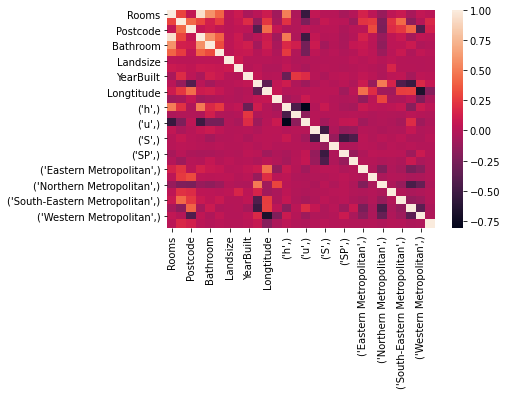

In [147]:
drop_list = ['Price','log_price','high_price','low_price']
data_clean = data.drop(drop_list, axis = 1)
target = data['log_price']

sns.heatmap(data_clean.corr())

Text(0.5, 1.0, 'Variable Correlation')

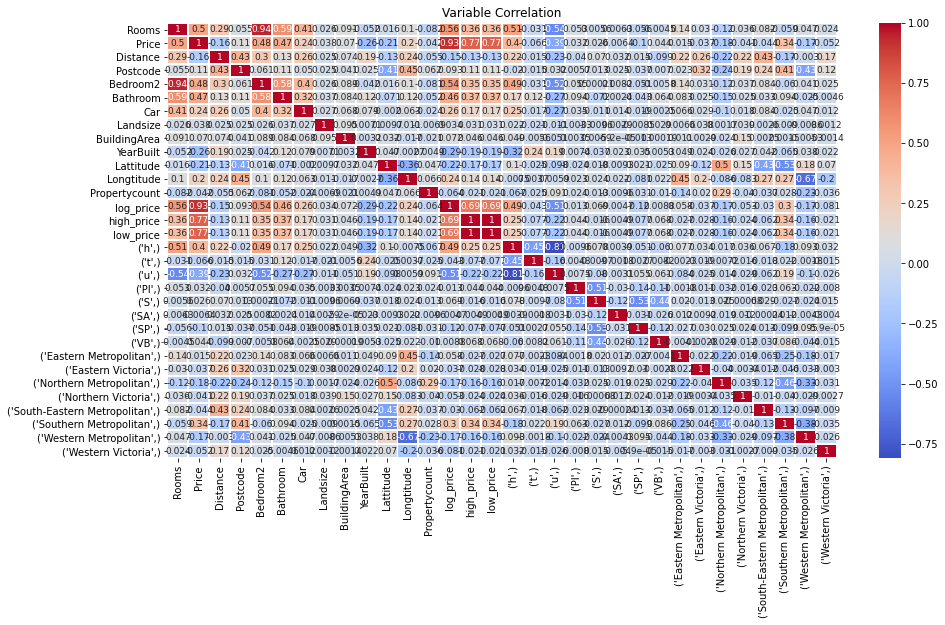

In [150]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='coolwarm', annot= True, linewidth=1,annot_kws={"size": 9})
plt.title('Variable Correlation')

Text(0.5, 1.0, 'BuildingArea v Price')

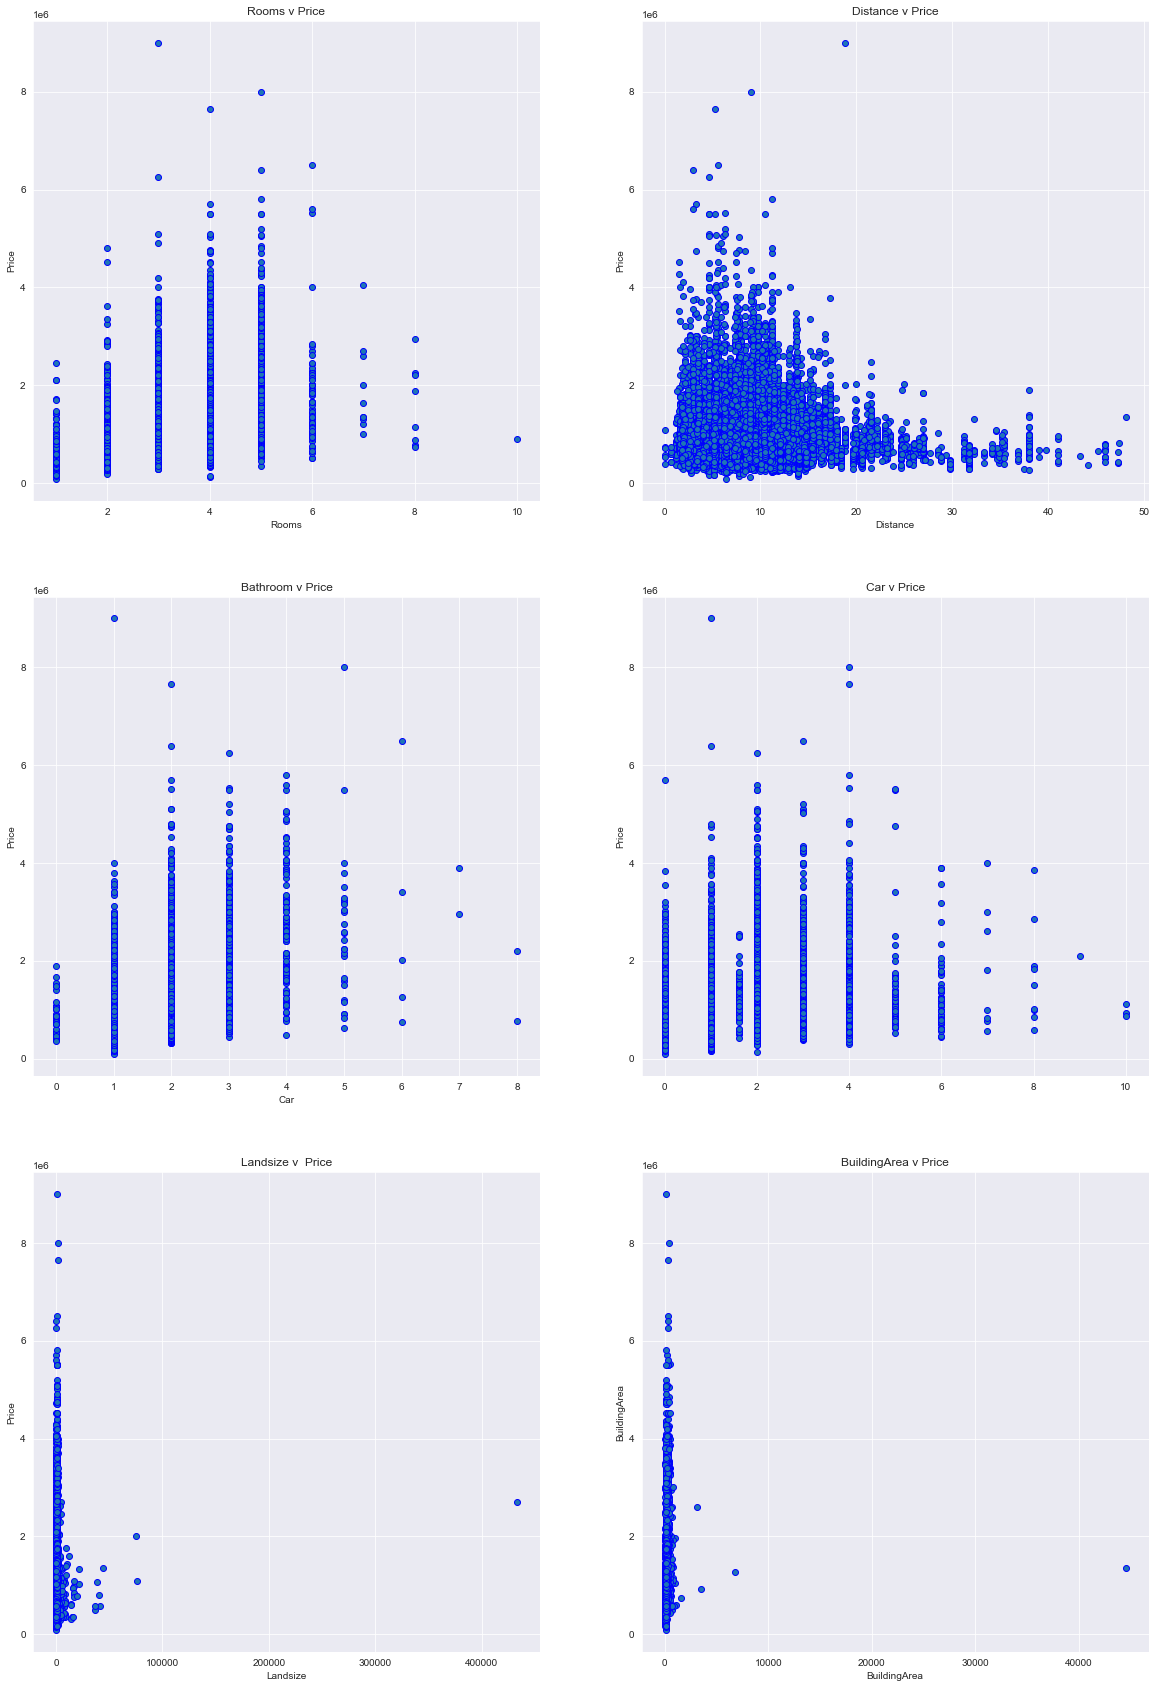

In [157]:
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (20,30))
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data
                  , edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rooms                          13580 non-null  int64  
 1   Price                          13580 non-null  int64  
 2   Distance                       13580 non-null  float64
 3   Postcode                       13580 non-null  int64  
 4   Bedroom2                       13580 non-null  int64  
 5   Bathroom                       13580 non-null  int64  
 6   Car                            13580 non-null  float64
 7   Landsize                       13580 non-null  int64  
 8   BuildingArea                   13580 non-null  float64
 9   YearBuilt                      13580 non-null  float64
 10  Lattitude                      13580 non-null  float64
 11  Longtitude                     13580 non-null  float64
 12  Propertycount                  13580 non-null 

<AxesSubplot:xlabel='Rooms', ylabel='count'>

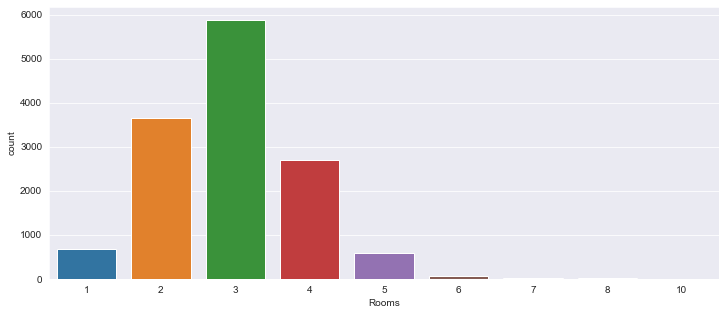

In [161]:
plt.figure(figsize = (12,5))
sns.countplot(data["Rooms"])